# Two component Universe

Thie notebook solves the simple perturbation equations for a universe filled with only radiation and matter.

In [1]:
from math import pi
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_formats={'retina','png'}

Define the equations.  Convention is that the vector of unknows `y[0:5]` contains $(a, \Phi, \delta_m, v_m, \delta_r, v_r)$.

By convention $a_0=1$ in the code

In [2]:
def f(tau, Y):
    a = Y[0]
    Phi = Y[1]
    dm = Y[2]
    vm = Y[3]
    dr = Y[4]
    vr = Y[5]
    Ha = a*H0*np.sqrt(OM/a**3+Or/a**4+OL)
    k2 = k*k
    da = Ha*a
    dPhi = -(3/2*H0*H0*(dm*OM/a+dr*Or/(a*a))+(k2+3*Ha*Ha)*Phi)/3/Ha
    ddm = 3*dPhi+k2*vm
    dvm = -Phi-Ha*vm
    ddr = 4*dPhi+4/3*k2*vr
    dvr = -Phi-dr/4
    #if abs(dr*Or/a/(dm*OM))<1e-4:
    #    ddr = 0
    #    dvr = 0
    return [da,dPhi,ddm,dvm,ddr,dvr]

Define the adiabatic initial conditions

In [3]:
def adiabatic_ic(eta):
    return [H0*eta*np.sqrt(Or), -2/3, 1, eta/3, 4/3, eta/3]

Solve from conformal time tau1 to conformal time tau2 with given initial conditions

In [4]:
def solve(eta1, eta2, ic):
    return solve_ivp(f, (eta1, eta2), ic)

## Mode entering at MD

In [18]:
k=0.0008

h=0.67556
omega_cdm=0.12038
omega_b=0.022032
H0=h*100*3.33564e-6 # 1/Mpc
OM=(omega_cdm+omega_b)/h**2
Or=1.68*2.473e-5/h**2
OL=1-OM-Or

eta1 = 1
eta2 = 14000
#eta2 = 18000
res = solve(eta1, eta2, adiabatic_ic(eta1))

Find the equality and horizon corssing times

In [19]:
# define interpolation functions; we want the value of tau when the argument is equal to 2pi (or 1 for equality)
tau_at_rho_m_over_r = interp1d(OM/(Or/res.y[0,:]),res.t)
tau_at_crossing = interp1d(H0*np.sqrt(OM/res.y[0,:]**3+Or/res.y[0,:]**4)/(k/res.y[0,:]), res.t)
# finally get these times
tau_eq = tau_at_rho_m_over_r(1.)
tau_x = tau_at_crossing(1.)

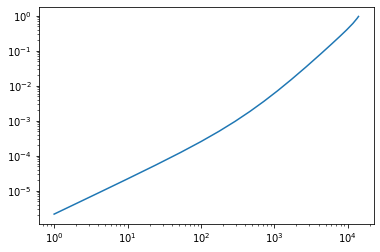

In [25]:
plt.loglog(res.t,res.y[0,:], label=r"$a$")

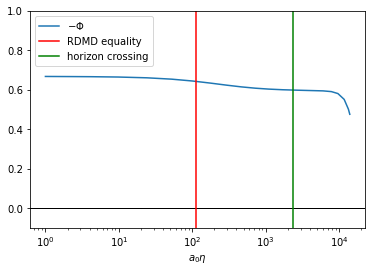

In [20]:
plt.xlabel(r"$a_0\eta$")
plt.semilogx(res.t,-res.y[1,:], label=r"$-\Phi$")
plt.ylim(-0.1,1)
plt.axhline(0, color='black', lw=1)
plt.axvline(tau_eq, color='red', label="RDMD equality")
plt.axvline(tau_x, color="green", label="horizon crossing")
plt.legend()

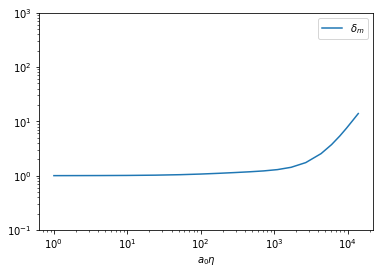

In [23]:
plt.xlabel(r"$a_0\eta$")
plt.ylim(0.1,1e3)
plt.loglog(res.t,res.y[2,:], label=r"$\delta_m$")
#plt.loglog(res.t, res.y[4,:], label=r"$\delta_r$")
#plt.loglog(res.t, (res.y[2,:]*OM/res.y[0,:]+res.y[4,:]*Or/res.y[0,:]**2)/(OM/res.y[0,:]+Or/res.y[0,:]**2),
#          label=r"$\delta_{tot}$")
#plt.axvline(tau_eq, color='red', label="RDMD equality")
#plt.axvline(tau_x, color="green", label="horizon crossing")
plt.legend()

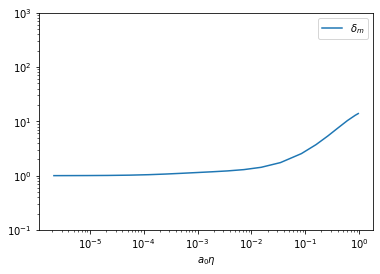

In [22]:
plt.xlabel(r"$a_0\eta$")
plt.ylim(0.1,1e3)
plt.loglog(res.y[0,:],res.y[2,:], label=r"$\delta_m$")
#plt.loglog(res.t, res.y[4,:], label=r"$\delta_r$")
#plt.loglog(res.t, (res.y[2,:]*OM/res.y[0,:]+res.y[4,:]*Or/res.y[0,:]**2)/(OM/res.y[0,:]+Or/res.y[0,:]**2),
#          label=r"$\delta_{tot}$")
#plt.axvline(tau_eq, color='red', label="RDMD equality")
#plt.axvline(tau_x, color="green", label="horizon crossing")
plt.legend()

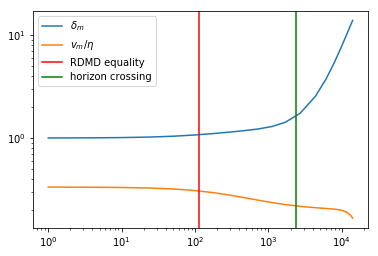

In [9]:
plt.loglog(res.t,res.y[2,:], label=r"$\delta_m$")
plt.loglog(res.t,res.y[3,:]/res.t, label=r"$v_m/\eta$")
plt.axvline(tau_eq, color='red', label="RDMD equality")
plt.axvline(tau_x, color="green", label="horizon crossing")
plt.legend()

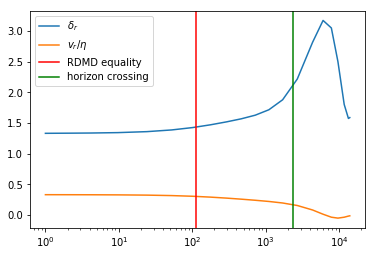

In [10]:
plt.semilogx(res.t,res.y[4,:], label=r"$\delta_r$")
plt.semilogx(res.t,res.y[5,:]/res.t, label=r"$v_r/\eta$")
plt.axvline(tau_eq, color='red', label="RDMD equality")
plt.axvline(tau_x, color="green", label="horizon crossing")
plt.legend()

## Mode entering at RD

Be careful -- do not run the simulations for large $k$ up to late times -- oscillations makes the computation time very long.

In [11]:
k=0.5

h=0.67556
omega_cdm=0.12038
omega_b=0.022032
H0=h*100*3.33564e-6 # 1/Mpc
OM=(omega_cdm+omega_b)/h**2
Or=1.68*2.473e-5/h**2
OL=1-OM-Or

eta1 = 0.1
eta2 = 1000
res = solve(eta1, eta2, adiabatic_ic(eta1))

Find the equality and horizon corssing times

In [12]:
# define interpolation functions; we want the value of tau when the argument is equal to 2pi (or 1 for equality)
tau_at_rho_m_over_r = interp1d(OM/(Or/res.y[0,:]),res.t)
tau_at_crossing = interp1d(H0*np.sqrt(OM/res.y[0,:]**3+Or/res.y[0,:]**4)/(k/res.y[0,:]), res.t)
# finally get these times
tau_eq = tau_at_rho_m_over_r(1.)
tau_x = tau_at_crossing(1.)

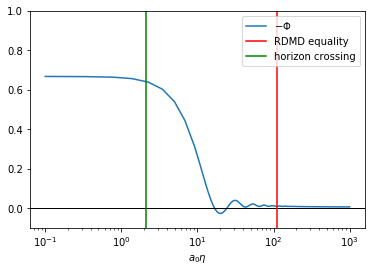

In [13]:
plt.xlabel(r"$a_0\eta$")
plt.semilogx(res.t,-res.y[1,:], label=r"$-\Phi$")
plt.ylim(-0.1,1)
plt.axhline(0, color='black', lw=1)
plt.axvline(tau_eq, color='red', label="RDMD equality")
plt.axvline(tau_x, color="green", label="horizon crossing")
plt.legend()

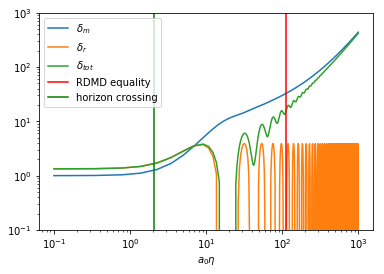

In [14]:
plt.xlabel(r"$a_0\eta$")
plt.ylim(0.1,1e3)
plt.loglog(res.t,res.y[2,:], label=r"$\delta_m$")
plt.loglog(res.t, res.y[4,:], label=r"$\delta_r$")
plt.loglog(res.t, (res.y[2,:]*OM/res.y[0,:]+res.y[4,:]*Or/res.y[0,:]**2)/(OM/res.y[0,:]+Or/res.y[0,:]**2),
          label=r"$\delta_{tot}$")
plt.axvline(tau_eq, color='red', label="RDMD equality")
plt.axvline(tau_x, color="green", label="horizon crossing")
plt.legend()

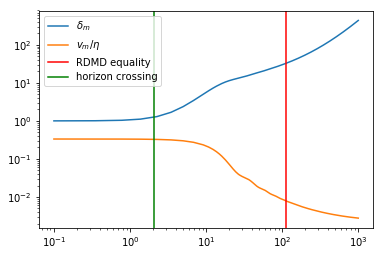

In [15]:
plt.loglog(res.t,res.y[2,:], label=r"$\delta_m$")
plt.loglog(res.t,res.y[3,:]/res.t, label=r"$v_m/\eta$")
plt.axvline(tau_eq, color='red', label="RDMD equality")
plt.axvline(tau_x, color="green", label="horizon crossing")
plt.legend()

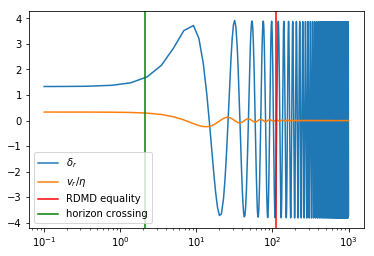

In [16]:
plt.semilogx(res.t,res.y[4,:], label=r"$\delta_r$")
plt.semilogx(res.t,res.y[5,:]/res.t, label=r"$v_r/\eta$")
plt.axvline(tau_eq, color='red', label="RDMD equality")
plt.axvline(tau_x, color="green", label="horizon crossing")
plt.legend()